In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import time
from datetime import timedelta


In [2]:
# Load the data into different dataframes
light_cpu       = pd.read_csv('light cpu.csv')
light_mem       = pd.read_csv('light mem.csv')
light_network   = pd.read_csv('light network.csv')


#Set time as index
light_cpu['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(light_cpu))]
light_cpu.set_index('Time', inplace=True)
light_cpu["Combined"] = light_cpu[light_cpu.keys()].sum(axis=1)

#Set time as index
light_mem['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(light_mem))]
light_mem.set_index('Time', inplace=True)
light_mem = light_mem.apply(lambda x: x/1000000)
light_mem["Combined"] = light_mem[light_mem.keys()].sum(axis=1)

#Set time as index
light_network['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(light_network))]
light_network.set_index('Time', inplace=True)
light_network = light_network.apply(lambda x: x/1000000)
light_network["Combined"] = light_network[light_network.keys()].sum(axis=1)


# Lightweight platform
### CPU

In [3]:
light_cpu.head()

,ot-ditto-connectivity-7b564988f7-kbvbr,ot-ditto-gateway-5b9f6dc596-p47k2,ot-ditto-mongodb-669768b5b4-kw98h,ot-ditto-nginx-d4bb498fc-9wjlb,ot-ditto-policies-575d5579db-pl9dm,ot-ditto-things-588dd96f9-lrw9k,ot-ditto-thingssearch-c9559c6d-dbvf9,ot-mosquitto-5f7bdff747-rtf8v,Combined
Time,,,,,,,,,
0:00:00,3.507269,2.910820,27.060421,0,2.374734,2.934781,2.250136,0.037745,41.075906
0:00:15,3.507885,2.911329,26.869314,0,2.373474,2.936116,2.238499,0.037773,40.874390
0:00:30,3.441378,2.894632,27.067625,0,2.385736,2.948400,2.249899,0.037774,41.025444
0:00:45,3.454030,2.901847,26.948816,0,2.400028,2.967019,2.252133,0.037831,40.961704
0:01:00,3.469825,2.873114,27.734444,0,2.409218,2.979920,2.258876,0.037686,41.763083


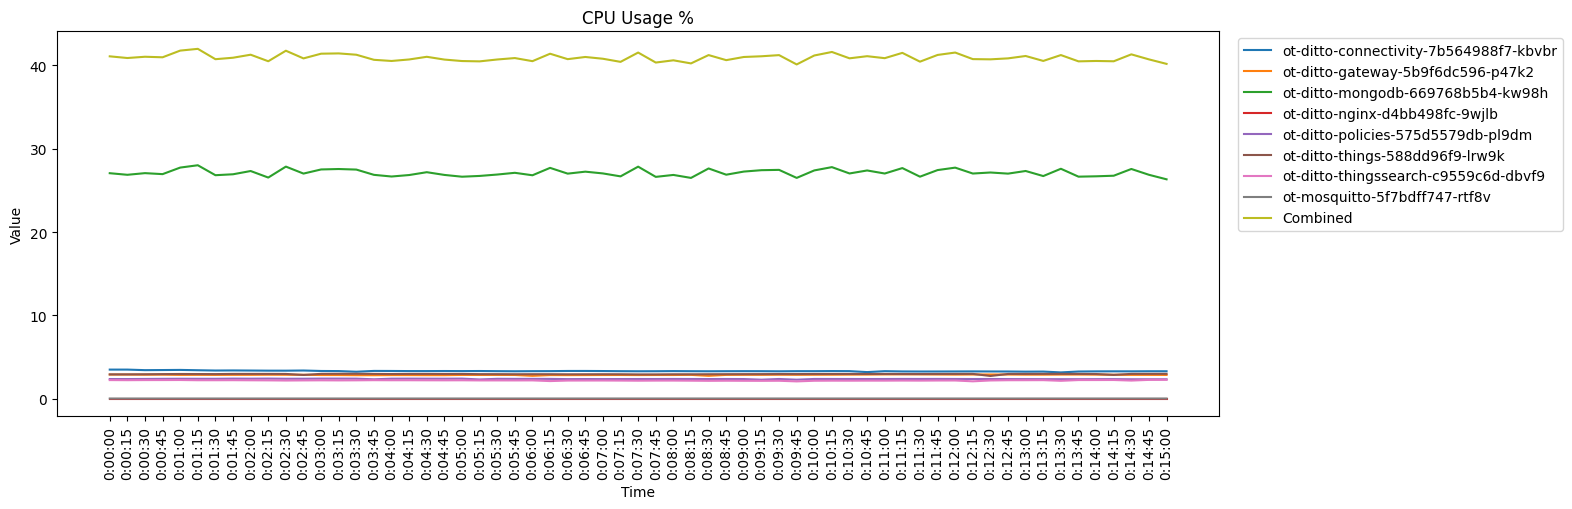

In [4]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(light_cpu.index, light_cpu)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('CPU Usage %')
plt.legend(light_cpu.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(light_cpu, x=light_cpu.index, y=light_cpu.keys(), title='CPU Usage %')
fig.show()


### Memory

In [5]:
light_mem.head()

,ot-ditto-connectivity-7b564988f7-kbvbr,ot-ditto-gateway-5b9f6dc596-p47k2,ot-ditto-mongodb-669768b5b4-kw98h,ot-ditto-nginx-d4bb498fc-9wjlb,ot-ditto-policies-575d5579db-pl9dm,ot-ditto-things-588dd96f9-lrw9k,ot-ditto-thingssearch-c9559c6d-dbvf9,ot-mosquitto-5f7bdff747-rtf8v,Combined
Time,,,,,,,,,
0:00:00,519.122944,448.483328,422.526976,5.55008,458.539008,483.282944,451.760128,1.196032,2790.461440
0:00:15,519.086080,448.245760,422.453248,5.55008,458.670080,483.348480,451.911680,1.064960,2790.330368
0:00:30,519.020544,448.364544,423.555072,5.55008,458.919936,483.274752,451.780608,1.064960,2791.530496
0:00:45,518.606848,448.364544,422.494208,5.55008,458.764288,483.045376,451.739648,1.064960,2789.629952
0:01:00,519.360512,448.266240,422.658048,5.55008,458.665984,483.053568,451.739648,1.064960,2790.359040


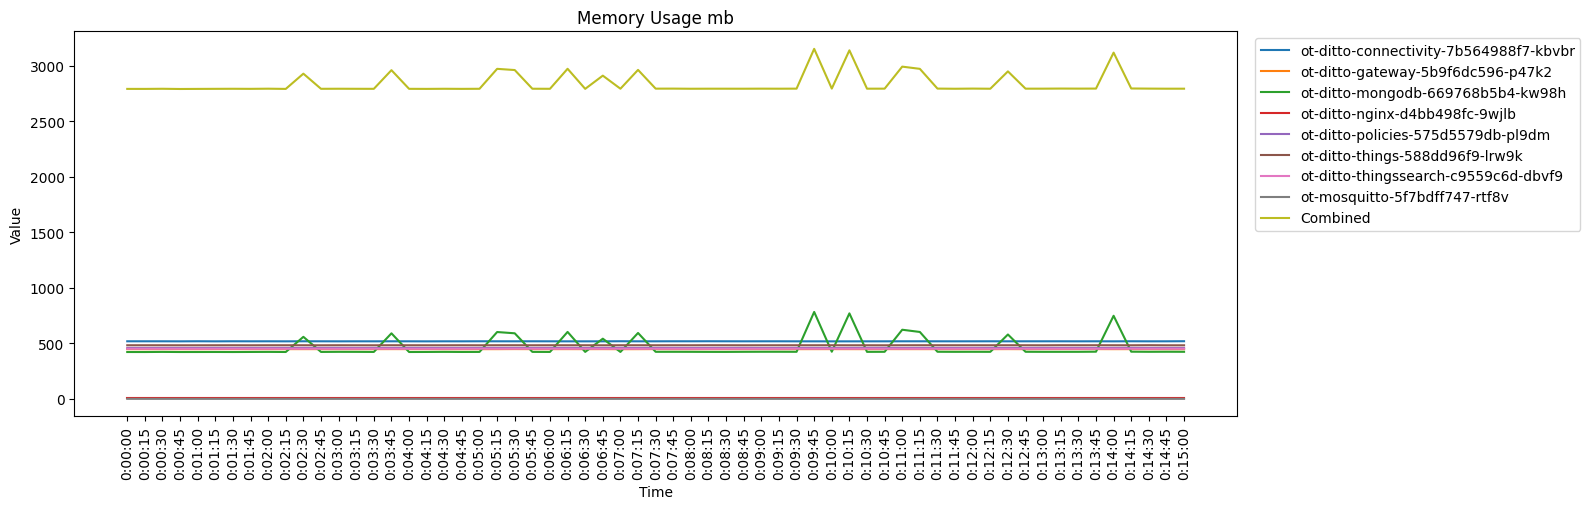

In [6]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(light_mem.index, light_mem)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Memory Usage mb')
plt.legend(light_mem.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(light_mem, x=light_mem.index, y=light_mem.keys(), title='Memory Usage mb')
fig.show()

### Network

In [7]:
light_network.head()

,ot-ditto-connectivity-7b564988f7-kbvbr,ot-ditto-gateway-5b9f6dc596-p47k2,ot-ditto-mongodb-669768b5b4-kw98h,ot-ditto-nginx-d4bb498fc-9wjlb,ot-ditto-policies-575d5579db-pl9dm,ot-ditto-things-588dd96f9-lrw9k,ot-ditto-thingssearch-c9559c6d-dbvf9,ot-mosquitto-5f7bdff747-rtf8v,Combined
Time,,,,,,,,,
0:00:00,0.011307,0.010488,0.003192,9.916667e-07,0.009354,0.011117,0.006865,0.000058,0.052383
0:00:15,0.011315,0.010382,0.003183,9.731548e-07,0.009340,0.011114,0.006879,0.000059,0.052273
0:00:30,0.011286,0.010663,0.003070,9.604632e-07,0.009349,0.011120,0.006853,0.000057,0.052399
0:00:45,0.011232,0.010626,0.003112,9.554423e-07,0.009361,0.011119,0.006831,0.000058,0.052340
0:01:00,0.011256,0.010050,0.003133,7.126665e-07,0.009369,0.010856,0.006821,0.000059,0.051544


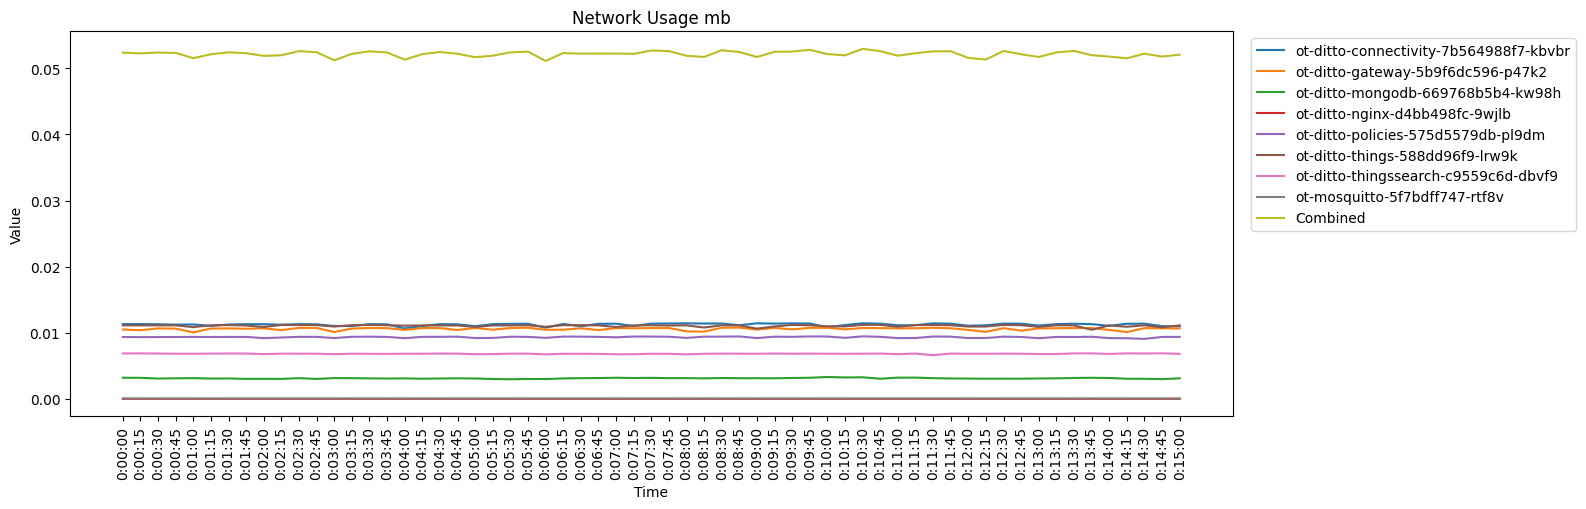

In [8]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(light_network.index, light_network)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Network Usage mb')
plt.legend(light_network.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(light_network, x=light_network.index, y=light_network.keys(), title='Network Usage mb')
fig.show()

### Combining total measurements into one dataset

In [9]:
# Combine one column from each dataframe into a new dataframe
# Select the desired columns from each dataframe
column_cpu = light_cpu['Combined']
column_mem = light_mem['Combined']
column_network = light_network['Combined']

# Combine the selected columns into a new dataframe
combined_df = pd.concat([column_cpu, column_mem, column_network], axis=1)
combined_df.columns = ['CPU', 'Memory', 'Network']
combined_df['Time'] = combined_df.index
# combined_df.set_index('Time', inplace=True)
# Print the combined dataframe
print(combined_df)

combined_df.to_csv('light_combined.csv', index=False)


          Combined     Combined  Combined
Time                                     
0:00:00  41.075906  2790.461440  0.052383
0:00:15  40.874390  2790.330368  0.052273
0:00:30  41.025444  2791.530496  0.052399
0:00:45  40.961704  2789.629952  0.052340
0:01:00  41.763083  2790.359040  0.051544
...            ...          ...       ...
0:14:00  40.519814  3116.888064  0.051789
0:14:15  40.483290  2794.156032  0.051525
0:14:30  41.312718  2793.005056  0.052223
0:14:45  40.710506  2792.222720  0.051784
0:15:00  40.170597  2792.275968  0.052082

[61 rows x 3 columns]
